In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('base_clean.csv')

/Users/emelinemaire/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (52,53,54,55,56,57,60,61,62,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
conditions = [df['Transsexual'] == 'Yes - Preop', 
              df['Transsexual'] =='Yes - Postop', 
              df['Transsexual'] == 'No']

values = ['Yes', 'Yes', 'No']
df['Transgender'] = np.select(conditions, values)

On regarde selon les pays

In [4]:
df['pays'].value_counts()

US                 21520
 Canada              437
 United Kingdom      245
 Mexico              161
 Germany              87
                   ...  
 Peru                  1
 Macao                 1
 Sweden                1
 Bahamas               1
 Jersey                1
Name: pays, Length: 66, dtype: int64

In [5]:
df = df[df['pays'] == 'US']

In [6]:
len(df)

21520

In [7]:
df.drop('pays', axis = 1, inplace = True)
#df.drop('service_d', axis = 1, inplace = True)
#df.drop('Service_z', axis = 1, inplace = True)
#df.drop('service_c', axis = 1, inplace = True)
#df.drop('service_b', axis = 1, inplace = True)
#df.drop('Agency_Name', axis = 1, inplace = True)
#df.drop('Phone 2', axis = 1, inplace = True)

In [8]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

Création d'un dataframe pour rapport population générale / populationd des prostituées

In [35]:
df.columns

Index(['Service_x', 'Length', 'Price', 'Agency', 'City', 'Incall', 'On_Time',
       'Porn_Star', 'Languages', 'Service_y', 'Other_City_Serviced',
       'Phone_Type', 'Smokes', 'Availability',
       'Services_Delivered_As_Promised', 'Build', 'Ethnicity', 'Age',
       'Eye_Color', 'Hair_Color', 'Hair_Type', 'Hair_Length', 'Piercings',
       'Pussy', 'Photo_Accurate', 'Height', 'Transsexual', 'Breast_Size',
       'Breast_Cup', 'Breast_Implants', 'Breast_Appearance', 'Tattoos',
       'Massage', 'Sex', 'Blow_Job', 'Cum_In_Mouth', 'Touch_Pussy', 'Kiss',
       'Two_Girl_Action', 'More_Than_One_Guy_At_A_Time',
       'Multiple_Pops_Allowed', 'Squirt', 'Female_Condom', 'Massage_Quality',
       'S_M', 'Lick_Pussy', 'Anal', 'Will_Bring_Second_Provider',
       'Full_No_Rush_Session', 'Rimming', 'Allow_Film_Or_Picture', 'service_a',
       'Transsexual_Functionality', 'Transsexual_Versatility',
       'Transsexual_Cock_Size', 'Transsexual_Circumcised',
       'Transsexual_Ejaculates', 'Ph

## Premières explorations par Etats

In [9]:
pop = pd.DataFrame()

In [10]:
column_names = ['States', 'Population']

states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'NC', 'SC', 'CO', 'CT', 
          'ND', 'SD', 'DE',  
          'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY',
          'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 
          'NE', 'NV', 'NH', 'NJ', 'NY', 'NM',  'OH',
          'OK', 'OR', 'PA', 'RI', 'TN', 'TX', 'UT',
          'VT', 'VA', 'WV', 'WA', 'DC', 'WI', 'WY'
               ]

population = [4888871, 737438, 7171646, 3013825, 39557045, 10383620,
             5084127, 5695564, 3572665, 760077, 882235, 967171, 21299325,
             10519475, 1420491, 1754208, 12741080, 6691878, 3156145, 
             2911505, 4468402, 4659978, 1338404, 6042718, 6902149, 9995915,
             5611179, 2986530, 6126452, 1062305, 1929268, 3034392, 1356458, 
             8908520, 19542209, 2095428, 11689442, 3943079, 4190713, 
             12807060, 1057315, 6770010, 28701845, 3161105, 626299, 8517685,
             1805832, 7535591, 702455, 5813568, 577737]

for i in range(len(states)) : 
    popu = {'States' : states[i], 'Population' : population[i],
           'NbProst' : len(df[df['States'] == ' ' + states[i]]),
           'NbTrans' : len(df[(df['States'] == ' ' + states[i]) & 
                          (df['Transgender'] == 'Yes')])}
    pop = pop.append(popu, ignore_index = True)

In [11]:
pop

,States,Population,NbProst,NbTrans
0,AL,4888871.0,67.0,4.0
1,AK,737438.0,15.0,3.0
2,AZ,7171646.0,840.0,128.0
3,AR,3013825.0,16.0,2.0
4,CA,39557045.0,3799.0,935.0
5,NC,10383620.0,785.0,77.0
6,SC,5084127.0,208.0,15.0
7,CO,5695564.0,268.0,56.0
8,CT,3572665.0,262.0,49.0
9,ND,760077.0,41.0,4.0


In [13]:
pop['Pourcent_mille'] = pop['NbProst']*100000/pop['Population']

In [15]:
pop['Pourcent_mille'].describe()

count    51.000000
mean      6.452125
std      10.838226
min       0.000000
25%       1.870643
50%       3.928985
75%       8.130635
max      76.161462
Name: Pourcent_mille, dtype: float64

In [16]:
print(pop[pop['Pourcent_mille'] < 2])

   States  Population  NbProst  NbTrans  Pourcent_mille
0      AL   4888871.0     67.0      4.0        1.370460
3      AR   3013825.0     16.0      2.0        0.530887
10     SD    882235.0     16.0      0.0        1.813576
15     ID   1754208.0      5.0      0.0        0.285029
17     IN   6691878.0    129.0     10.0        1.927710
19     KS   2911505.0     34.0      6.0        1.167781
20     KY   4468402.0     79.0      5.0        1.767970
21     LA   4659978.0     70.0      9.0        1.502153
27     MS   2986530.0     14.0      1.0        0.468771
29     MT   1062305.0      7.0      0.0        0.658944
37     OK   3943079.0     52.0     15.0        1.318766
44     VT    626299.0     10.0      0.0        1.596681
46     WV   1805832.0     12.0      0.0        0.664514
50     WY    577737.0      0.0      0.0        0.000000


Alaska / Arkansas / Dakota du Sud / Idaho / Indiana / Kansas / Kentucky / Louisiane / Mississippi / Montana / Oklahoma / Vermont / Virginie Occidentale / Wyoming

In [17]:
print(pop[pop['Pourcent_mille'] > 9.9])

   States  Population  NbProst  NbTrans  Pourcent_mille
2      AZ   7171646.0    840.0    128.0       11.712792
31     NV   3034392.0    681.0    129.0       22.442717
43     UT   3161105.0    398.0     27.0       12.590534
45     VA   8517685.0   1025.0    117.0       12.033786
48     DC    702455.0    535.0     99.0       76.161462


Arizona / Nevada / Utah / Virginie / District of Columbia (Washington D.C.)

In [18]:
pop['NbTrans'].describe()

count     51.000000
mean      80.568627
std      159.992282
min        0.000000
25%        4.000000
50%       20.000000
75%       92.000000
max      935.000000
Name: NbTrans, dtype: float64

In [19]:
pop['Pourcent_mille_trans'] = pop['NbTrans']*100000/pop['Population']

In [89]:
pop

,States,Population,NbProst,NbTrans,Pourcent_mille,Pourcent_mille_trans
0,AL,4888871.0,67.0,4.0,1.370460,0.081818
1,AK,737438.0,15.0,3.0,2.034069,0.406814
2,AZ,7171646.0,840.0,128.0,11.712792,1.784806
3,AR,3013825.0,16.0,2.0,0.530887,0.066361
4,CA,39557045.0,3799.0,935.0,9.603852,2.363675
5,NC,10383620.0,785.0,77.0,7.559984,0.741553
6,SC,5084127.0,208.0,15.0,4.091165,0.295036
7,CO,5695564.0,268.0,56.0,4.705416,0.983221
8,CT,3572665.0,262.0,49.0,7.333461,1.371525
9,ND,760077.0,41.0,4.0,5.394190,0.526262


In [21]:
pop['Rapport_Cis/Trans'] = pop['NbTrans']*100/pop['NbProst']

In [22]:
pop['Rapport_Cis/Trans'].describe()

count    50.000000
mean     13.662802
std       8.419637
min       0.000000
25%       7.158296
50%      12.584842
75%      19.891304
max      31.085714
Name: Rapport_Cis/Trans, dtype: float64

In [30]:
print(pop[pop['Pourcent_mille'] < 1])

   States  Population  NbProst  NbTrans  Pourcent_mille  Pourcent_mille_trans  \
3      AR   3013825.0     16.0      2.0        0.530887              0.066361   
15     ID   1754208.0      5.0      0.0        0.285029              0.000000   
27     MS   2986530.0     14.0      1.0        0.468771              0.033484   
29     MT   1062305.0      7.0      0.0        0.658944              0.000000   
46     WV   1805832.0     12.0      0.0        0.664514              0.000000   
50     WY    577737.0      0.0      0.0        0.000000              0.000000   

    Rapport_Cis/Trans  
3           12.500000  
15           0.000000  
27           7.142857  
29           0.000000  
46           0.000000  
50                NaN  


In [29]:
print(pop[pop['Pourcent_mille']  > 9.8])

   States  Population  NbProst  NbTrans  Pourcent_mille  Pourcent_mille_trans  \
2      AZ   7171646.0    840.0    128.0       11.712792              1.784806   
26     MN   5611179.0    553.0     68.0        9.855326              1.211867   
31     NV   3034392.0    681.0    129.0       22.442717              4.251264   
43     UT   3161105.0    398.0     27.0       12.590534              0.854132   
45     VA   8517685.0   1025.0    117.0       12.033786              1.373613   
48     DC    702455.0    535.0     99.0       76.161462             14.093429   

    Rapport_Cis/Trans  
2           15.238095  
26          12.296564  
31          18.942731  
43           6.783920  
45          11.414634  
48          18.504673  


In [27]:
print(pop[pop['Pourcent_mille_trans'] > 2])

   States  Population  NbProst  NbTrans  Pourcent_mille  Pourcent_mille_trans  \
4      CA  39557045.0   3799.0    935.0        9.603852              2.363675   
16     IL  12741080.0   1207.0    292.0        9.473294              2.291799   
24     MA   6902149.0    604.0    166.0        8.750898              2.405048   
31     NV   3034392.0    681.0    129.0       22.442717              4.251264   
34     NY  19542209.0   1900.0    506.0        9.722545              2.589267   
48     DC    702455.0    535.0     99.0       76.161462             14.093429   

    Rapport_Cis/Trans  
4           24.611740  
16          24.192212  
24          27.483444  
31          18.942731  
34          26.631579  
48          18.504673  


## Création du log(prix) / prix par durée

In [98]:
df['logprice'] = np.log(df['Price'])

In [99]:
df['Price_Length'] = df['Price'] / df['Length']

In [100]:
df['Price_Length'].describe()

count    21520.000000
mean         5.096528
std          5.242539
min          0.333333
25%          3.333333
50%          4.166667
75%          5.833333
max        533.333333
Name: Price_Length, dtype: float64

#### Les personnes trans sont-elles plus suceptibles d'avoir des prestations courtes ? 

In [108]:
conditions = [df['Length'] <= 60,
             (df['Length'] > 60) & (df['Length'] <= 120),
             (df['Length'] > 120)]

values = ['<1h', '1h - 2h', '>2h']

df['Length_cat'] = np.select(conditions, values)

In [111]:
pd.crosstab(df.Transgender, df.Length_cat, normalize = 'index')

Length_cat,1h - 2h,<1h,>2h
Transgender,,,
No,0.042330,0.952961,0.00471
Yes,0.029204,0.967875,0.00292


Globalement, plutôt des services assez courts, assez proches niveau proportion pour les trans et les cis 

#### Plot des distributions des prix

/Users/emelinemaire/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


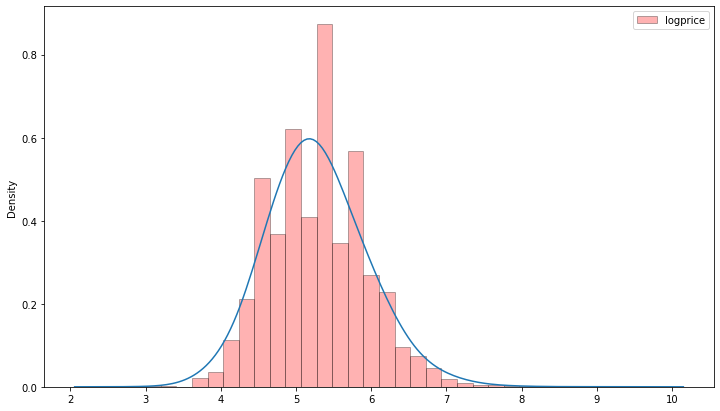

In [114]:
plt.figure(figsize=(12,7))
plt.hist(df['logprice'], edgecolor='black', bins=30, alpha=.3, density=True, color='red', label='logprice')
g = sns.kdeplot(np.array(df['logprice']), bw=0.5)
plt.legend()
plt.savefig('distrib_logprice.png')
plt.show()

In [118]:
df['logprice'].describe()

count    21520.000000
mean         5.274154
std          0.625563
min          2.995732
25%          4.787492
50%          5.298317
75%          5.703782
max          9.210340
Name: logprice, dtype: float64

In [123]:
dfT = df.loc[df['Transgender'] == 'Yes']
dfC = df.loc[df['Transgender'] == 'No']

/Users/emelinemaire/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/Users/emelinemaire/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


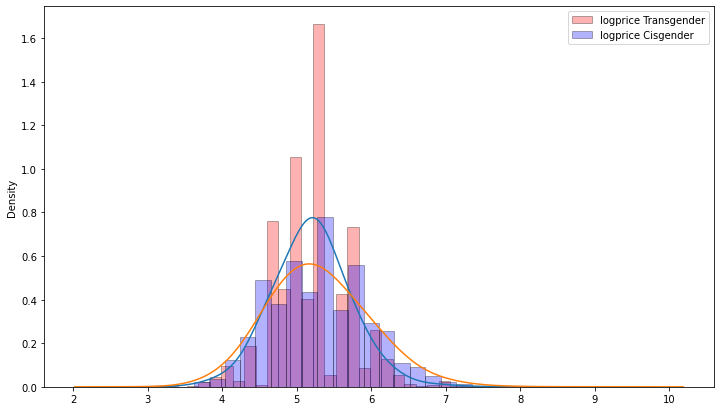

In [128]:
plt.figure(figsize=(12,7))
plt.hist(dfT['logprice'], edgecolor='black', bins=30, alpha=.3, density=True, color='red', label='logprice Transgender')
plt.hist(dfC['logprice'], edgecolor='black', bins=30, alpha=.3, density=True, color='blue', label='logprice Cisgender')
g = sns.kdeplot(np.array(dfT['logprice']), bw=0.5)
h = sns.kdeplot(np.array(dfC['logprice']), bw = 0.5)
plt.legend()
plt.savefig('distrib_logprice_trans.png')
plt.show()

## Etude des services

In [32]:
df['Service_x'].unique()

array(['Escort Incall', 'Massage ', 'Escort ', 'Escort Outcall',
       'Massage Nude', 'Escort With another Girl', 'Escort And Anal',
       'S&M ', 'Escort Second Pop', 'Massage Body to Body',
       'Massage and Blow Job', 'Escort And Dinner Date',
       'Massage Sensual Domination', 'Massage Hand Job',
       'Massage Topless', 'Escort With Another Guy', 'Escort With Couple',
       'Massage Tantra', 'S&M With Another Girl'], dtype=object)